好用工具：

* https://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference

注意事項：
* 如果畫圖出現中文亂碼：https://blog.csdn.net/fwj_ntu/article/details/105598145

# 套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = 'SimHei'
from scipy import stats

In [2]:
occupation_dict = {
    1: "營造／礦砂業",
    2: "製造業",
    3: "水電燃氣業",
    4: "批發／零售／貿易商",
    5: "旅宿／餐飲",
    6: "運輸倉儲",
    7: "農／林／漁／牧",
    8: "金融保險",
    9: "不動產／租賃",
    10: "軍／警／消",
    11: "公務人員",
    12: "律師／會計師／地政士",
    13: "醫藥服務",
    14: "休閒服務",
    15: "其他／家管",
    16: "自由業",
    17: "投資／自營商",
    18: "媒體文教",
    19: "學生",
    20: "學校教師（含行政人員）",
    21: "資訊科技",
    22: "公證人或記帳士",
    23: "國防工業",
    24: "投資或稅務顧問公司",
    25: "不動產仲介／代銷商",
    26: "大宗物資貿易商",
    27: "博弈業（網路／實體）",
    28: "八大特種行業",
    29: "宗教、慈善、基金會",
    30: "銀樓、珠寶商",
    31: "藝術品或古董買賣商",
    32: "當鋪",
    33: "實體或虛擬貨幣兌換所"
}

# 資料預處理

In [3]:
# 選擇你要的欄位
selected_columns = [
    
    # yes/no
    'sex',
    'isReject',
    'hasOtherComAccount',

    # categorical
    # 'bid',
    'source',
    'occupation',
    'company',
    'eduLevel',

    # numerical-like
    'expInvestment', 
    'yrsInvestment', 
    'frqInvestment',
    'srcCapital',
    'quotaCredit',
    'incomeYear',
    'totalWealth',
    
    'quota_origin',
    'quota_now'
]


data = pd.read_csv('./data/data.csv') # 載入資料
data = data[selected_columns] # 選擇欄位
data = data.dropna() # 移除空值列

# ---------------------------------------------------------------------------- #

data = data[data['quota_now']>0]
# data = data[data['quota_now']<=0.6e6]
data = data[data['quota_now']<=1e6]
# data = data[data['quota_now']==1000000]
# data = data[data['quota_now']<0.2e6]
# data = data[data['quota_now']<=0.7e6]

# data = data[data['source']=='FUGLE']

data = data[data['isReject']==0]
data = data.drop('isReject', axis=1)

# data = data[data['quota_origin']==100000]

# data = data[data['occupation']==19]
# data = data.drop('source', axis=1)

# ---------------------------------------------------------------------------- #

data['quota_origin'] /= 1e4 # 單位縮放
data['quota_now'] /= 1e4 # 單位縮放
# data = data[(np.abs(stats.zscore(data['quota_now'].values)) < 2)] # 移除outlier

FileNotFoundError: [Errno 2] No such file or directory: './data/data.csv'

In [15]:
data['occupation'] = data['occupation'].map(occupation_dict)

In [16]:
data.head()

,sex,hasOtherComAccount,source,occupation,company,eduLevel,expInvestment,yrsInvestment,frqInvestment,srcCapital,quotaCredit,incomeYear,totalWealth,quota_origin,quota_now
0,1,0,FUGLE,資訊科技,華誠資訊有限公司,2,0,3,2,0,0,1,1,100.0,50.0
1,1,1,FUGLE,媒體文教,臺視電視台,0,4,3,0,0,0,1,1,100.0,100.0
3,1,1,FUGLE,製造業,台灣先藝,0,4,3,3,0,0,2,2,100.0,100.0
4,1,1,FUGLE,製造業,廣積科技股份有限公司,0,3,1,0,0,1,1,1,100.0,100.0
5,1,1,玉證,資訊科技,SGS,0,0,3,2,0,0,1,0,50.0,100.0


In [17]:
# quick look at our data types & null counts 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127485 entries, 0 to 131490
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sex                 127485 non-null  int64  
 1   hasOtherComAccount  127485 non-null  int64  
 2   source              127485 non-null  object 
 3   occupation          127481 non-null  object 
 4   company             127485 non-null  object 
 5   eduLevel            127485 non-null  int64  
 6   expInvestment       127485 non-null  int64  
 7   yrsInvestment       127485 non-null  int64  
 8   frqInvestment       127485 non-null  int64  
 9   srcCapital          127485 non-null  int64  
 10  quotaCredit         127485 non-null  int64  
 11  incomeYear          127485 non-null  int64  
 12  totalWealth         127485 non-null  int64  
 13  quota_origin        127485 non-null  float64
 14  quota_now           127485 non-null  float64
dtypes: float64(2), int64(10), object(3

In [18]:
# 查看numerical data的分佈
data.describe()

,sex,hasOtherComAccount,eduLevel,expInvestment,yrsInvestment,frqInvestment,srcCapital,quotaCredit,incomeYear,totalWealth,quota_origin,quota_now
count,127485.000000,127485.000000,127485.000000,127485.000000,127485.000000,127485.000000,127485.00000,127485.000000,127485.000000,127485.000000,127485.000000,127485.00000
mean,1.510303,0.391889,0.784947,0.830506,2.240389,1.431172,0.04002,0.111158,0.617806,0.577315,59.850955,61.46116
std,0.499896,0.488174,1.151358,1.356018,0.804426,1.648816,0.28548,0.350795,0.682415,0.673559,41.070814,40.10842
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.000000,19.00000
50%,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,1.000000,0.000000,60.000000,71.00000
75%,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.00000,0.000000,1.000000,1.000000,100.000000,100.00000
max,2.000000,1.000000,7.000000,4.000000,3.000000,5.000000,3.00000,4.000000,2.000000,2.000000,400.000000,100.00000


# 分析

## 各欄位分佈

<ipython-input-19-339c625775cf>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax, bins=20)


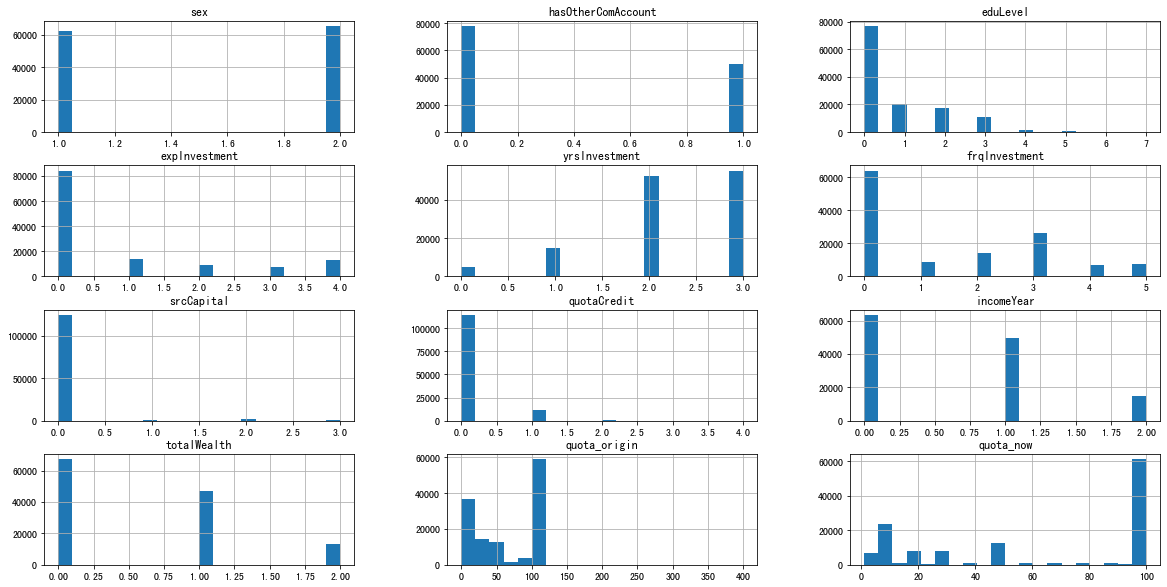

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
data.hist(ax=ax, bins=20)
plt.show()
plt.close()

## 產業 v.s. 開戶

In [20]:
pd.pivot_table(data=data, index="occupation", columns="source", values="quota_now", aggfunc=['count', 'mean', 'std'])

count                               mean                         \
source       Anue   FUGLE    三竹       玉證        Anue      FUGLE          三竹   
occupation                                                                    
不動產仲介／代銷商     1.0   127.0   2.0    208.0   50.000000  95.275591   55.000000   
不動產／租賃        NaN   401.0   1.0    628.0         NaN  96.845387  100.000000   
休閒服務          4.0  2320.0  18.0   2784.0   49.500000  96.356466   57.666667   
八大特種行業        NaN    34.0   1.0     58.0         NaN  89.382353   50.000000   
公務人員          1.0  2798.0   2.0   2432.0   10.000000  96.765904   75.000000   
公證人或記帳士       NaN    63.0   NaN     82.0         NaN  88.190476         NaN   
其他／家管         7.0  6057.0   7.0   7330.0   61.142857  48.813274   27.142857   
博弈業（網路／實體）    NaN    27.0   NaN     48.0         NaN  72.962963         NaN   
國防工業          NaN    61.0   NaN     51.0         NaN  94.016393         NaN   
大宗物資貿易商       NaN    30.0   1.0     26.0         NaN  90.000000  100.000000   
媒體文教          1.0  1683.0   4.0   1335.0  100.000000  96.729055   40.250000   
學校教師（含行政人員）   5.0  2610.0   6.0   2877.0   52.800000  96.630651   67.666667   
學生            4.0  5599.0  15.0   4415.0    6.000000  25.028041   19.066667   
宗教、慈善、基金會     NaN   373.0   1.0    325.0         NaN  85.967828  100.000000   
實體或虛擬貨幣兌換所    NaN     7.0   NaN     10.0         NaN  74.285714         NaN   
律師／會計師／地政士    1.0   535.0   NaN    453.0  100.000000  94.084112         NaN   
批發／零售／貿易商    13.0  5641.0  34.0   6867.0   53.769231  96.492289   80.705882   
投資或稅務顧問公司     NaN    78.0   NaN     61.0         NaN  93.538462         NaN   
投資／自營商        1.0   385.0   3.0    535.0   10.000000  91.106494   46.666667   
旅宿／餐飲         1.0  3219.0  16.0   4031.0  100.000000  95.936316   71.187500   
水電燃氣業         NaN   470.0   NaN    541.0         NaN  96.268085         NaN   
營造／礦砂業        2.0  1569.0   7.0   1824.0   27.500000  95.976418  100.000000   
當鋪            NaN     4.0   NaN     11.0         NaN  95.000000         NaN   
自由業           7.0  1214.0  12.0   2411.0   56.000000  60.716639   43.250000   
藝術品或古董買賣商     1.0    22.0   NaN     28.0    9.000000  80.954545         NaN   
製造業           7.0  9206.0  39.0  11358.0   33.285714  96.321312   70.230769   
資訊科技          8.0  6858.0  21.0   4566.0   54.875000  96.675270   91.904762   
軍／警／消         3.0  1578.0   3.0   1733.0   70.000000  95.449303   70.000000   
農／林／漁／牧       NaN   293.0   2.0    430.0         NaN  95.484642   34.500000   
運輸倉儲          1.0  1395.0   9.0   1683.0   30.000000  96.025806   70.888889   
醫藥服務          2.0  4307.0  13.0   4731.0   54.500000  96.166705   62.076923   
金融保險          5.0  1947.0   8.0   2329.0   56.000000  96.250128   77.500000   
銀樓、珠寶商        NaN    22.0   NaN     47.0         NaN  90.681818         NaN   

                              std                                   
source              玉證       Anue      FUGLE         三竹         玉證  
occupation                                                          
不動產仲介／代銷商    52.504808        NaN  18.347474  63.639610  36.180839  
不動產／租賃       48.969745        NaN  13.717727        NaN  35.541615  
休閒服務         35.515445  37.863791  14.661778  44.008021  32.394672  
八大特種行業       24.431034        NaN  26.837349        NaN  23.135082  
公務人員         46.330181        NaN  12.961697  35.355339  34.919911  
公證人或記帳士      38.987805        NaN  29.735315        NaN  35.027500  
其他／家管        40.782128  47.841504  42.851399  33.022359  34.287885  
博弈業（網路／實體）   30.437500        NaN  40.174122        NaN  29.294474  
國防工業         33.411765        NaN  20.017069        NaN  29.977442  
大宗物資貿易商      49.230769        NaN  26.652295        NaN  35.423504  
媒體文教         43.432959        NaN  13.362513  45.169127  35.187182  
學校教師（含行政人員）  45.938478  43.837199  14.336347  50.106553  36.000773  
學生           23.915062   4.690416  32.098245  27.481076  28.918715  
宗教、慈善、基金會    38.963077        NaN  30.984284        NaN  34.065

## 相關性分析

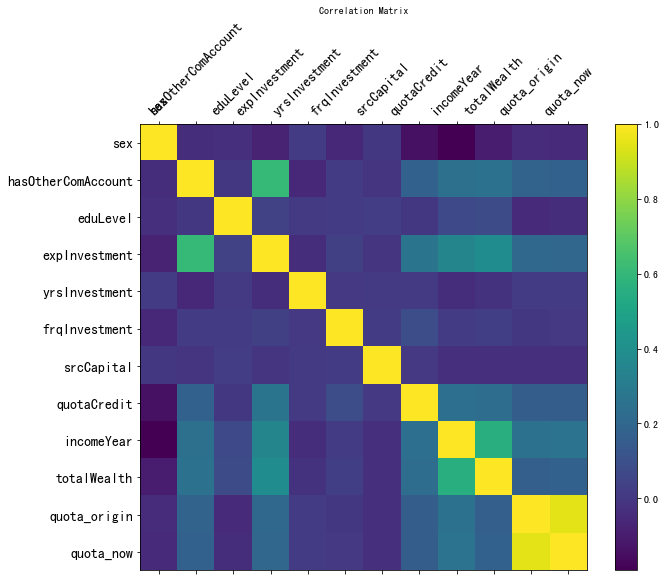

In [21]:
# pearson coefficient
corr = data.corr('pearson')
f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=10)
plt.show()
plt.close()

# sns.heatmap(data.corr())
# plt.show()

## 各欄位 v.s. quota_now

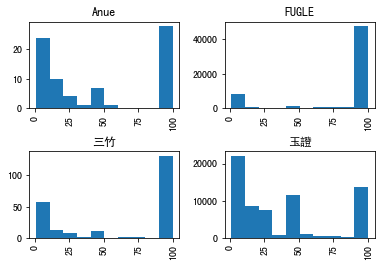

In [23]:
data.hist(column='quota_now', by='source')
plt.show()
plt.close()

/home/jack/miniconda3/envs/ml/lib/python3.9/site-packages/pandas/plotting/_matplotlib/hist.py:396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  axes = _grouped_hist(


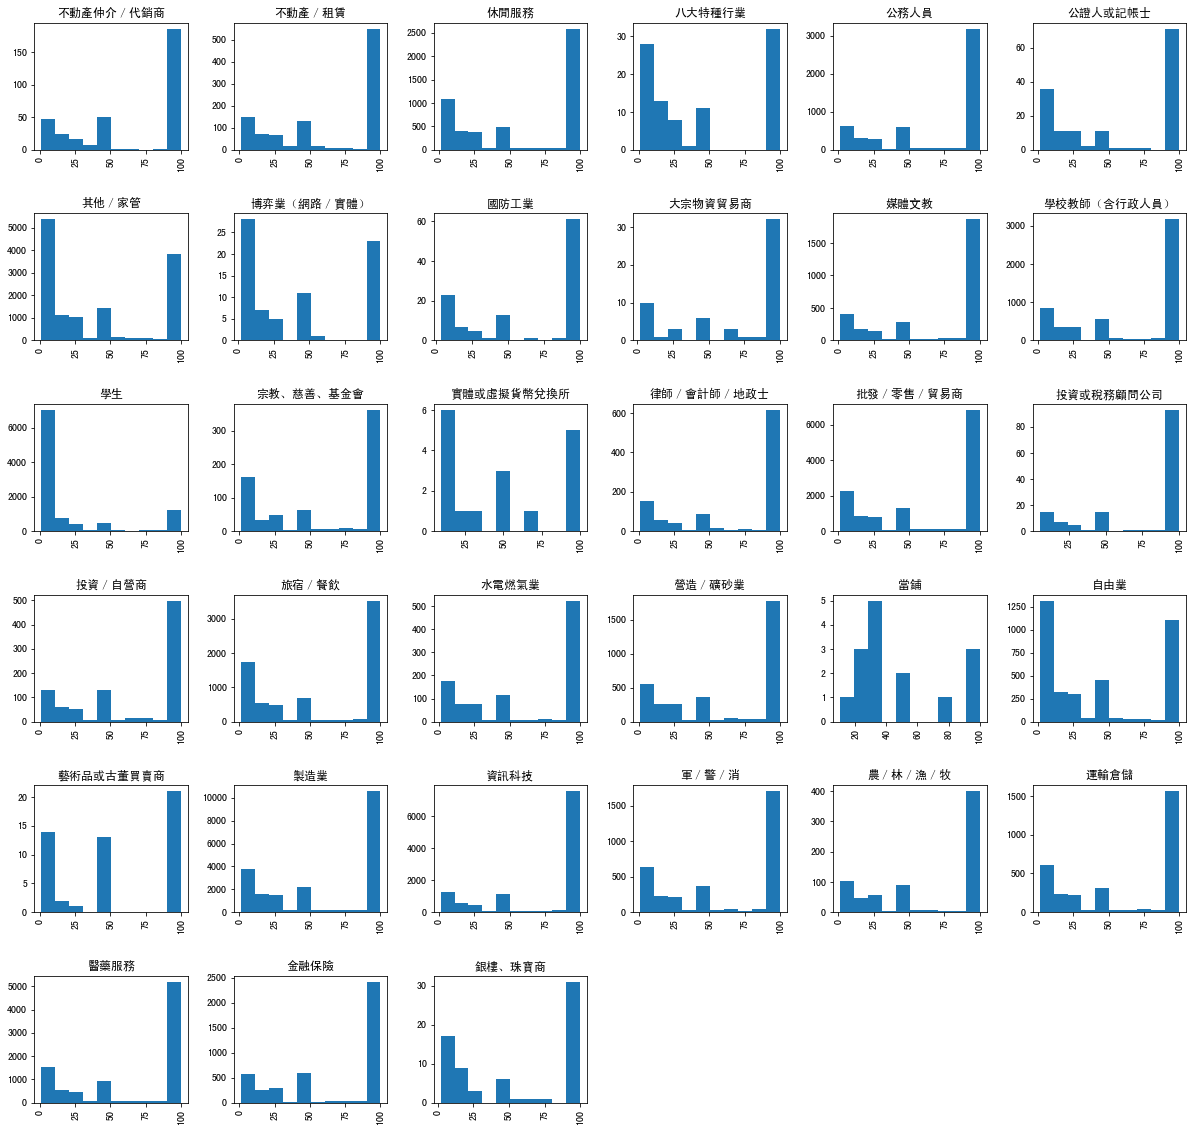

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
data.hist(column='quota_now', by='occupation', ax=ax)
plt.show()
plt.close()

# 資料預處理

In [16]:
def round_to_five(x):
    y = x/5 - x // 5
    if y >= 0.5:
        return (x // 5)*5 + 5
    else:
        return (x // 5)*5

In [17]:
# data['quota_now'] = data['quota_now'].apply(round_to_five)

In [18]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [ ]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33)

# Linear Regression

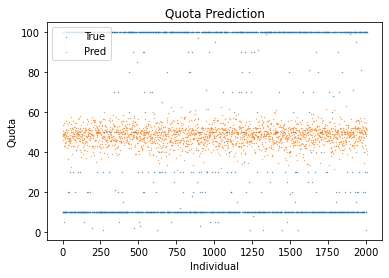

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_valid)
plt.scatter(range(len(Y_pred)), Y_valid, s=0.1, label='True')
plt.scatter(range(len(Y_pred)), Y_pred, s=0.1, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()

# Random Foreset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred = model.predict(X_valid).astype(int)

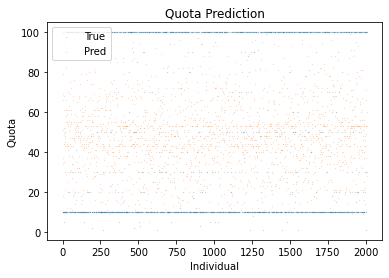

In [ ]:
plt.scatter(range(len(Y_pred)), Y_valid, s=0.01, label='True')
plt.scatter(range(len(Y_pred)), Y_pred, s=0.01, label='Pred')
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


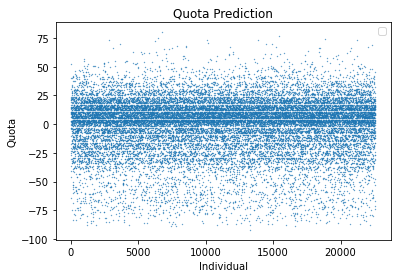

In [ ]:
Y_diff = Y_pred - Y_valid
plt.scatter(range(len(Y_diff)), Y_diff, s=0.1)
plt.title('Quota Prediction')
plt.xlabel('Individual')
plt.ylabel('Quota')
plt.legend()
plt.show()

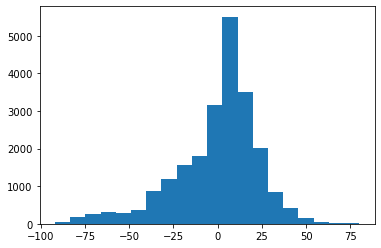

In [ ]:
plt.hist(Y_diff, bins=20)
plt.show()